In [50]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import pickle as pk
import os

In [57]:
root = os.path.join("..", "logs", "GIN", "ZINC1k")
time = "20200518_102029"

In [60]:
with open(os.path.join(root, time, "1", "classifier_metrics.pk"), "rb") as f:
    met1 = pk.load(f)
with open(os.path.join(root, time, "3", "classifier_metrics.pk"), "rb") as f:
    met2 = pk.load(f)

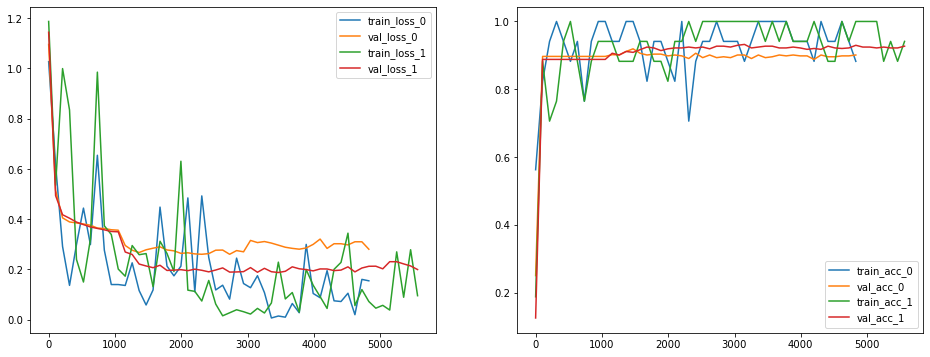

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i, met in enumerate([met1, met2]):
    dif = int((len(met["training_losses"])-1) / (len(met["validating_losses"])-1))
    x1 = list(range(len(met["training_losses"])))[::dif]
    axes[0].plot(x1, met["training_losses"][::dif], label=f"train_loss_{i}")
    x2 = list(range(len(met["training_losses"])))[::dif]
    axes[0].plot(x2, met["validating_losses"], label=f"val_loss_{i}")
    axes[0].legend()
for i, met in enumerate([met1, met2]):
    dif = int((len(met["training_accs"])-1) / (len(met["validating_accs"])-1))
    x1 = list(range(len(met["training_accs"])))[::dif]
    axes[1].plot(x1, met["training_accs"][::dif], label=f"train_acc_{i}")
    x2 = list(range(len(met["training_losses"])))[::dif]
    axes[1].plot(x2, met["validating_accs"], label=f"val_acc_{i}")
    axes[1].legend()
plt.show()

In [40]:
plt.close("all")